<img src="../../data/images/gempy_logo.png" />

# <center> From Maps to Models - Tutorials for structural geological modeling using GemPy and GemGIS</center>

# Example 1 - Planar Dipping Layers

This example will show how to convert the geological map below using ``GemGIS`` to a `GemPy` model. This example is based on digitized data. The area is 972 m wide (W-E extent) and 1069 m high (N-S extent). The vertical model extents varies between 200 m and 800 m. The model represents two planar stratigraphic units (blue=Sand and red=Clay) dipping towards the south above an unspecified basement (yellow=Sand). 

<div class="alert alert-block alert-success">
<b>In this tutorial, you will learn the following:</b> <br>
- How to create a digital elevation model/topography from digitized topographic contour lines <br>
- How to extract the Z coordinates of interface points (=vertices of the digitized layer boundaries) from the digital elevation model<br>
- How to calculate orientations based on intersections between topographic contour lines and layer boundaries (strike lines)<br>
- How to build your first <b>GemPy</b> model with input data generated through <b>GemGIS</b><br>
- How to create, calculate and display a custom-section using <b>GemGIS</b> and <b>GemPy</b> <br>
- How to export the calculated layers as <b>PyVista</b> meshes <br>
- How to sample orientations from the mesh to compare it to your calculated and the provided orientations <br>
- How to display the dip and azimuth values as scalars on the mesh
</div>

## Your Tasks
1. Georeference the map in QGIS given the dimensions above using the coordinate reference system with the EPSG code 4326
2. Digitize the layer boundaries (including a `formation` column) and the topographic lines (including a `Z` column)
3. Digitize so-called strike lines for the top and the base of the clay layer and calculate the dip of the layer for its top and base (predefined orientation values will be provided for the modeling in GemPy
4. Digitize a so-called custom-section along the bold black horizontal line. You will create a custom section at this location of the model


## Contents

1. [Installing GemPy and GemGIS](#installing-gempy)
2. [Importing Libraries](#importing-libraries)
3. [Data Preparation](#data-preparation)
    1. [Creating Digital Elevation Model from Contour lines](#creating-digital-elevation-model-from-contour-lines)
        1. [Loading Contour Lines](#loading-contour-lines)
        2. [Plotting Contour Lines](#plotting-contour-lines)
        3. [Interpolating Contour Lines](#interpolating-contour-lines)
        4. [Plotting the raster](#plotting-the-raster)
        5. [Saving the raster to disc](#saving-the-raster-to-disc)
        6. [Opening raster](#opening-raster)
    2. [Processing Stratigraphic Boundaries](#processing-stratigraphic-boundaries)
        1. [Opening Stratigraphic Boundaries](#opening-stratigraphic-boundaries)
        2. [Plotting Stratigraphic Boundaries](#plotting-stratigraphic-boundaries)
        3. [Extractin X-Y Coordinates from GeoDataFrame](#extracting-xy-coordinates-from-geodataframe)
        3. [Extracting Z coordinates from Digital Elevation Model](#extracting-z-coordinates-from-digital-elevation-model)
        4. [Plotting the Interface Points](#plotting-the-interface-points)
    3. [Processing Orientations](#processing-orientations)
        1. [Orientations from Strike Lines](#orientations-from-strike-lines)
        2. [Loading Strike Lines](#loading-strike-lines)
        3. [Plotting Strike Lines](#plotting-strike-lines)
        4. [Calculate Dipping Angles](#calculate-dipping-angles)
        5. [Opening Orientations](#opening-orientations)
        6. [Plotting Orientations](#plotting-orientations)
4. [GemPy Model calculation](#gempy-model-calculation)
    1. [Creating the GemPy Model](#creating-the-gempy-model)
    2. [Data Initiation](#data-initiation)
    3. [Inspecting the Surfaces](#inspecting-the-surfaces)
    4. [Inspecting the Input Data](#inspecting-the-input-data)
    5. [Map Stack to Surfaces](#map-stack-to-surfaces)
    6. [Showing the Number of Data Points](#showing-the-number-of-data-points)
    7. [Loading Digital Elevation Model](#loading-digital-elevation-model)
    8. [Defining Custom Section](#defining-custom-section)
    6. [Plotting Input Data in 2D](#plotting-the-input-data-in-2d)
    7. [Plotting Input Data in 3D](#plotting-the-input-data-in-3d)
    8. [Setting the Interpolator](#setting-the-interpolator)
    9. [Computing the Model](#computing-the-model)
5. [Model Visualization and Post-Processing](#model-visualization-and-post-processing)
    1. [Visualizing the computed model in 2D](#visualizing-the-computed-model-in-2d)
    2. [Visualizing the computed model in 3D](#visualizing-the-computed-model-in-3d)
    1. [Post Processing](#post-processing)
        1. [Export Depth Maps from PyVista Model](#export-depth-maps-from-gempy-model)
        2. [Calculating Orientations from Meshes](#calculating-orientations-from-meshes)
            1. [Calculating Orientations for one point](#calculating-orientations-for-one-point)
            2. [Calculating Orientations for all normals](#calculating-orientations-for-all-normals)
            3. [Plotting Dip and Azimuth as Scalars](#plotting-dip-and-azimuth-as-scalars)




<img src="../../data/images/example1/cover.png" width=700 />
Source: Powell, D. (1995): Interpretation geologischer Strukturen durch Karten - Eine praktische Anleitung mit Aufgaben und Lösungen, page 15, figure 10 A, Springer Verlag Berlin, Heidelberg, New York, ISBN: 978-3-540-58607-4.

<a id='installing-gempy'></a>

# Installing GemPy and GemGIS

If you have not installed `GemPy` yet, please follow the [GemPy installation instructions](https://docs.gempy.org/installation.html) and the [GemGIS installation instructions](https://gemgis.readthedocs.io/en/latest/getting_started/installation.html). If you encounter any issues, feel free to open a new discussion at [GemPy Discussions](https://github.com/cgre-aachen/gempy/discussions) or [GemGIS Discussions](https://github.com/cgre-aachen/gemgis/discussions). If you encounter an error in the installation process, feel free to also open an issue at [GemPy Issues](https://github.com/cgre-aachen/gempy/issues) or [GemGIS Issues](https://github.com/cgre-aachen/gemgis/issues). There, the `GemPy` and `GemGIS` development teams will help you out. 

<a id='importing-libraries'></a>

# Importing Libraries

For this notebook, we need the `geopandas` library for the data preparation, `rasterio` for dealing with the created digital elevation model, `matplotlib` for plotting, `numpy` for some numerical calculations and of course the `gempy` and `gemgis` libraries. Any warnings that may appear can be ignored for now. The file path is set to load the data provided for this tutorial. 

In [2]:
import geopandas as gpd
import rasterio
import warnings
warnings.filterwarnings("ignore")
import gemgis as gg
import matplotlib.pyplot as plt
import numpy as np
import gempy as gp
import pyvista as pv

C:\Users\ale93371\AppData\Local\Temp\ipykernel_12212\1345758308.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementati

In [4]:
file_path = '../../data/example01_planar_dipping_layers/'

<a id='data-preparation'></a>
# Data Preparation

At this point, you should have the topographic contour lines (including a `Z` column) and the layer boundaries (including a `formation` column) digitized. If not, please generate the data before continuing with this tutorial. 

<a id='creating-digital-elevation-model-from-contour-lines'></a>
## Creating Digital Elevation Model from Contour Lines

The digital elevation model (DEM) will be created by interpolating the contour lines digitized from the georeferenced map using the `SciPy` [Radial Basis Function interpolation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.Rbf.html) wrapped in `GemGIS`. The respective function used for that is `gg.vector.interpolate_raster()`. 


<img src="../../data/images/example1/dem_example1.png" width=700/>
Source: Powell, D. (1995): Interpretation geologischer Strukturen durch Karten - Eine praktische Anleitung mit Aufgaben und Lösungen, page 15, figure 10 A, Springer Verlag Berlin, Heidelberg, New York, ISBN: 978-3-540-58607-4.


<a id='loading-contour-lines'></a>
### Loading contour lines

First, the contour lines are loaded using `GeoPandas`. Please provide here the name of your shape file containing the digitized topographic contour lines. 

In [ ]:
topo = gpd.read_file(file_path + 'topo1.shp')
topo.head()

<a id='plotting-contour-lines'></a>

### Plotting the contour lines

The contour lines are plotted using the built-in plotting function of `GeoPandas`. 

In [ ]:
topo.plot(column='Z', aspect=1, legend=True, cmap='gist_earth')

<a id='interpolating-contour-lines'></a>

### Interpolating the contour lines

The digital elevation model (DEM) will be created by interpolating the contour lines digitized from the georeferenced map using the `SciPy` [Radial Basis Function interpolation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.Rbf.html) wrapped in `GemGIS`. The respective function used for that is `gg.vector.interpolate_raster()`. 

There is also a [tutorial available for this task on the GemGIS Documentation page](https://gemgis.readthedocs.io/en/latest/getting_started/tutorial/05_interpolating_rasters.html).

In [ ]:
topo_raster = gg.vector.interpolate_raster(gdf=topo, value='Z', method='rbf', res=5)

<a id='plotting-the-raster'></a>

### Plotting the raster

The interpolated digital elevation model can be displayed using `matplotlib` and its `plt.imshow()` function and by providing the extent of the raster to align it with the contour lines. 

In [ ]:
fig, ax = plt.subplots(1, figsize=(5, 5))
topo.plot(ax=ax, aspect='equal', column='Z', cmap='gist_earth')
im = plt.imshow(topo_raster, origin='lower', extent=[0, 972, 0, 1069], cmap='gist_earth')
cbar = plt.colorbar(im)
cbar.set_label('Altitude [m]')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_xlim(0, 972)
ax.set_ylim(0, 1069)

<a id='saving-the-raster-to-disc'></a>

### Saving the raster to disc

After the interpolation of the contour lines, the raster is saved to disc using `gg.raster.save_as_tiff()`. The function will not be executed as a raster is already provided with the example data. 

<a id='opening-raster'></a>

### Opening Raster

The previously computed and saved raster can now be opened using rasterio. 

In [ ]:
topo_raster = rasterio.open(file_path + 'raster1.tif')

<a id='processing-stratigraphic-boundaries'></a>

## Processing Stratigraphic Boundaries

The interface points will be extracted from LineStrings digitized from the georeferenced map using QGIS. It is important to provide a `formation` name for each layer boundary. Up until now, only the `X` and `Y` position are stored in the vertices of the LineStrings. Using the digital elevation model created already, we will now sample the elevation model at the locations of the vertices to extract the height at this point as the stratigraphic boundary was mapped at the surface.

<img src="../../data/images/example1/interfaces_example1.png" width=700/>
Source: Powell, D. (1995): Interpretation geologischer Strukturen durch Karten - Eine praktische Anleitung mit Aufgaben und Lösungen, page 15, figure 10 A, Springer Verlag Berlin, Heidelberg, New York, ISBN: 978-3-540-58607-4.

<a id='opening-stratigraphic-boundaries'></a>

### Opening Stratigraphic Boundaries

The stratigraphic units are opened using `GeoPandas`.

In [ ]:
interfaces = gpd.read_file(file_path + 'interfaces1_lines.shp')
interfaces.head()

<a id='plotting-stratigraphic-boundaries'></a>

### Plotting Stratigraphic Boundaries

In [ ]:
interfaces.plot(column='formation', aspect=1, legend=True)

<a id='extracting-xy-coordinates-from-geodataframe'></a>

### Extracting X-Y coordinates from GeoDataFrame


`GemPy` needs the `X`, `Y`, and `Z` location of interface points to constrain a model. For the case that `Z` coordinates are added in a later step or are not needed anymore since they are already stored in the `GeoDataFrame` we can use the `gg.vector.extract_xy()` function to extract the `X` and `Y` coordinates from the stratigraphic boundaries.

There is also a [tutorial available for this task on the GemGIS Documentation page](https://gemgis.readthedocs.io/en/latest/getting_started/tutorial/01_extract_xy.html).

In [ ]:
interfaces_xy = gg.vector.extract_xy(gdf=interfaces)
interfaces_xy

<a id='extracting-z-coordinates-from-digital-elevation-model'></a>

### Extracting Z coordinates from Digital Elevation Model

The vertical position of the interface point will be extracted from the digital elevation model using the `GemGIS` function `gg.vector.extract_xyz()`. The resulting GeoDataFrame now contains single points including the information about the respective `formation` as well as the `X`, `Y`, and `Z` location. This is all we need as preparational steps to generate input data for `GemPy`. 

There is also a [tutorial available for this task on the GemGIS Documentation page](https://gemgis.readthedocs.io/en/latest/getting_started/tutorial/02_extract_xyz.html).

In [ ]:
interfaces_coords = gg.vector.extract_xyz(gdf=interfaces, dem=topo_raster)
interfaces_coords

<a id='plotting-the-interface-points'></a>

### Plotting the Interface Points

The interface points incuding their altitude (Z-) values and the digitized LineString can be plotted using `matplotlib`. 

In [ ]:
fig, ax = plt.subplots(1, figsize=(5,5))

interfaces.plot(ax=ax, column='formation', legend=True, aspect='equal')
interfaces_coords.plot(ax=ax, column='Z', legend=True, aspect='equal', cmap='gist_earth', zorder=5)
plt.grid()
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_xlim(0, 972)
ax.set_ylim(0, 1069)

<a id='processing-orientations'></a>

## Processing Orientations

For this example, orientations are provided. However, you are asked to digitize strike lines constructed from the topographic contour lines and the layer boundaries. You will then manually calculate the distance between the strike lines of different altitude and use the height difference to calculate the dipping angle. The dip direction or azimuth is the normal to the strike line. 

<img src="../../data/images/example1/orientations_example1.png" width=700/>
Source: Powell, D. (1995): Interpretation geologischer Strukturen durch Karten - Eine praktische Anleitung mit Aufgaben und Lösungen, page 15, figure 10 A, Springer Verlag Berlin, Heidelberg, New York, ISBN: 978-3-540-58607-4.

<a id='orientations-strike-lines'></a>
### Orientations from Strike Lines

Strike lines connect outcropping stratigraphic boundaries (interfaces) of the same altitude. In other words: the intersections between topographic contours and stratigraphic boundaries at the surface. The height difference and the horizontal difference between two digitized lines is used to calculate the dip and azimuth and hence an orientation that is necessary for `GemPy`.

The slope between two strike lines and hence the dip is defined as

$$ tan(\alpha) = \frac{y_2-y_1}{x_2-x_1}$$

where $y_i$ represents the vertical positions and $x_i$ the horizontal positions 

<img src="../../data/images/fig3.png" width=500/>

By CrunchyRocks, after Karla Panchuck - https://openpress.usask.ca/physicalgeology/chapter/13-5-measuring-geological-structures/, CC BY 4.0, https://commons.wikimedia.org/w/index.php?curid=113554289


<img src="../../data/images/model1_strike_lines.png" width=500/>
Source: Powell, D. (1995): Interpretation geologischer Strukturen durch Karten - Eine praktische Anleitung mit Aufgaben und Lösungen, page 14, figure 8, Springer Verlag Berlin, Heidelberg, New York, ISBN: 978-3-540-58607-4.

<a id='loading-strike-lines'></a>
### Loading Strike Lines

We are using `GeoPandas` to load the strike lines. 

In [5]:
strike_lines = gpd.read_file(file_path + 'strike_lines1.shp')
strike_lines

,id,geometry
0,1,"LINESTRING (877.17178 209.26747, 809.08431 209..."
1,2,"LINESTRING (927.90686 383.12188, 62.60110 382...."
2,3,"LINESTRING (138.78635 554.82789, 681.50295 553..."
3,4,"LINESTRING (593.58418 720.08873, 191.00877 722..."
4,5,"LINESTRING (288.18215 895.92626, 481.20681 895..."


<a id='plotting-strike-lines'></a>

### Plotting Strike Lines

We can plot the strike lines as the contour lines and stratigraphic interfaces before. Here, we plot the strike lines for the top of the clay formation (red).

<img src="../../data/images/model1_strike_lines2.png" width=300/>
Source: Powell, D. (1995): Interpretation geologischer Strukturen durch Karten - Eine praktische Anleitung mit Aufgaben und Lösungen, page 15, figure 10 B, Springer Verlag Berlin, Heidelberg, New York, ISBN: 978-3-540-58607-4.

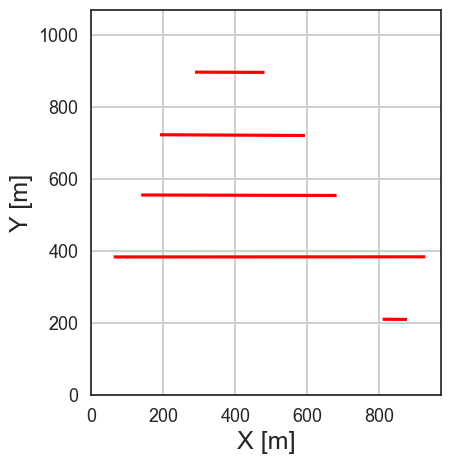

In [9]:
fig, ax = plt.subplots(1, figsize=(5, 5))
topo.plot(ax=ax, aspect='equal', column='Z', cmap='gist_earth', vmax=1000)
strike_lines.plot(ax=ax, aspect='equal', color='red')
interfaces.plot(ax=ax, column='formation', legend=True, aspect='equal')
cbar = plt.colorbar(im)
cbar.set_label('Altitude [m]')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_xlim(0, 972)
ax.set_ylim(0, 1069)
plt.grid()

<a id='calculate-dipping-angles'></a>

### Calculate dipping angles

We demonstrate here how to manually calculate the dipping angles using strike lines. First, we calculate the horizontal distance between the strike lines. From the plot above, we can see that the lines are parallel. Therefore, we are usinge the `shapely` distance function to calculate the distance between each pair of strike lines using list comprehension. 

In [ ]:
x_distances =[strike_lines.loc[i].geometry.distance(strike_lines.loc[i+1].geometry) for i in range(len(strike_lines)-1)]
x_distances

We then define the vertical offsets to be 100 m for each pair of strike lines. 

In [ ]:
y_distances = [100,100,100,100]
y_distances

Using the formula from above, we can calculate the tangent values of the slopes.

In [ ]:
tan_slopes = [y_distance/x_distance for y_distance, x_distance in zip(y_distances, x_distances)]
tan_slopes          

Using the arctangent, we can convert the tangents of the slopes int radians before converting them to degrees. We can see that the mean dip is equal to approximately 30.3°. 

In [ ]:
dip = [np.rad2deg(np.arctan(tan_slope)) for tan_slope in tan_slopes]
print('Mean dip: ' + str(np.mean(dip)) + '°')
dip

<a id='calculate-dipping-directions'></a>

### Calculate dipping directions

Apart from calculating the dipping angle, we also need to calculate the dipping direction or azimuth. From the plot above, we can expect a dipping towards the south (180°). Let us check if that is the case. 

We are using the arccosine and converting radians to degrees to get the angle of the line. As we can see the line strikes with approximately 90°. The normal of the line therefore strikes 90°+90° = 180° and is the expected result (discarding the little geometric variations during the generation of the strike lines). 

In [ ]:
linestring = strike_lines.loc[1].geometry

angle = np.rad2deg(np.arccos((linestring.coords[0][1] - linestring.coords[1][1]) / linestring.length))
angle

In [ ]:
azimuth = angle + 90
azimuth

<a id='opening-orientations'></a>

### Opening Orientations

For this example, the orientations have already been prepared and can be loaded via `GeoPandas`. After extracting the altitude values and assigning a fixed `polarity` value of 1, we can check out the dip and azimuth of the provided orientations and see that they nicely match our calculations above. We determined that the clay layer was of equal thickness resulting in equivalent dipping angles for the top and the base of the layer. Hence, we provide only orientations for the top and let `GemPy` do the rest. 

In [ ]:
orientations = gpd.read_file(file_path + 'orientations1.shp')
orientations = gg.vector.extract_xyz(gdf=orientations, dem=topo_raster)
orientations['polarity'] = 1
orientations

<a id='plotting-orientations'></a>

### Plotting the Orientations

The locations of the orientations can be plotted as before. They are all located at the top of the clay layer. 

In [ ]:
fig, ax = plt.subplots(1, figsize=(5,5))

interfaces.plot(ax=ax, column='formation', legend=True, aspect='equal')
interfaces_coords.plot(ax=ax, column='formation', legend=True, aspect='equal')
orientations.plot(ax=ax, color='red', aspect='equal')
plt.grid()
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_xlim(0, 972)
ax.set_ylim(0, 1069)

<a id='gempy-model-calculation'></a>

# GemPy Model Calculation


The creation of a `GemPy` Model follows particular steps which will be performed in the following:

1. Create new model: `gp.create_model()`
2. Data Initiation: `gp.init_data()`
3. Map Stack to Surfaces: `gp.map_stack_to_surfaces()`
4. [...]
5. Set the Interpolator: `gp.set_interpolator()`
6. Computing the Model: `gp.compute_model()`

<a id='creating-the-gempy-model'></a>

## Creating the GemPy Model

The first step is to create a new empty `GemPy` model by providing a name for it. 

In [ ]:
geo_model = gp.create_model('Model1')
geo_model

<a id='data-initiation'></a>

## Data Initiation

During this step, the `extent` of the model (`xmin`, `xmax`, `ymin`, `ymax`, `zmin`, `zmax`) and the `resolution` in `X`, `Y`and `Z` direction (`res_x`, `res_y`, `res_z`, equal to the number of cells in each direction) will be set using lists of values. 

The interface points (`surface_points_df`) and orientations (`orientations_df`) will be passed as `pandas` `DataFrames`. 

In [ ]:
gp.init_data(geo_model, [0, 972, 0, 1069, 200, 800], [100,100,100],
             surface_points_df=interfaces_coords,
             orientations_df=orientations,
             default_values=True)

<a id='inspecting-the-surfaces'></a>

## Inspecting the Surfaces

The model consists of four different layers or surfaces now which all belong to the `Default series`. During the next step, the proper `Series` will be assigned to the surfaces. Using the `surfaces`-attribute again, we can check which layers were loaded.

In [ ]:
geo_model.surfaces

<a id='inspecting-the-input-data'></a>

## Inspecting the Input Data

The loaded interface points and orientations can again be inspected using the `surface_points`- and `orientations`-attributes. Using the `df`-attribute of this object will convert the displayed table in a `pandas` `DataFrame`.

In [ ]:
geo_model.surface_points.df.head()

In [ ]:
geo_model.orientations.df.head()

<a id='map-stack-to-surfaces'></a>

## Map Stack to Surfaces

During this step, all two layers of the model are assigned to the `Strata1` series. We know that the layers modeled here are parallel. If the layers were not parallel as shown in the next models, multiple series would be defined. We will also add a `Basement` here (`geo_model.add_surfaces('Basement')`). The order within one series also defines the age relations within this series and has to be according to the depositional events of the layers.

In [ ]:
gp.map_stack_to_surfaces(geo_model,
                         {'Strata1': ('Sand1', 'Ton')},
                         remove_unused_series=True)
geo_model.add_surfaces('Basement')

In [ ]:
geo_model.stack

<a id='showing-the-number-of-data-points'></a>

## Showing the Number of Data Points

You can also return the number of interfaces and orientations for each formation using `gg.utils.show_number_of_data_points()`

In [ ]:
gg.utils.show_number_of_data_points(geo_model=geo_model)

<a id='loading-digital-elevation-model'></a>

## Loading Digital Elevation Model

`GemPy` is capable of including a topography into the modeling process. Here, we use the topography that we have interpolated in one of the previous steps. `GemPy` takes the file path of the raster/digital elevation model and loads it as grid into the `geo_model` object.

In [ ]:
geo_model.set_topography(source='gdal', filepath=file_path + 'raster1.tif')

<a id='defining-custom-section'></a>

## Defining Custom Section

It is possible to define straight (no bending) custom sections in `GemPy` that will be calculated additionally with a provided resolution and that can be displayed separately using `matplotlib`.

For this example, the bold black line indicates the location of the custom section. This custom section can be digitized with a LineString (line shape file) with vertices at both ends and loaded using `GeoPandas`. 

<img src="../../data/images/example1/cover.png" width=700/>
Source: Powell, D. (1995): Interpretation geologischer Strukturen durch Karten - Eine praktische Anleitung mit Aufgaben und Lösungen, page 15, figure 10 A, Springer Verlag Berlin, Heidelberg, New York, ISBN: 978-3-540-58607-4.

<img src="../../data/images/model1_custom_section.PNG" width=500/>

Source: Powell, D. (1995): Interpretation geologischer Strukturen durch Karten - Eine praktische Anleitung mit Aufgaben und Lösungen, page 16, figure 11 A, Springer Verlag Berlin, Heidelberg, New York, ISBN: 978-3-540-58607-4.

In [ ]:
custom_section = gpd.read_file(file_path + 'customsections1.shp')
custom_section

The function `gg.utils.to_section_dict()` converts the `GeoDataFrame` into a custom section dict before it can be set as section grid for the `geo_model` object and plotted using the built-in plotting function. 

In [ ]:
custom_section_dict = gg.utils.to_section_dict(custom_section, section_column='section')
custom_section_dict

In [ ]:
geo_model.set_section_grid(custom_section_dict)

In [ ]:
gp.plot.plot_section_traces(geo_model)

<a id='plotting-the-input-data-in-2d'></a>

## Plotting the input data in 2D using Matplotlib

The input data can now be visualized in 2D using `matplotlib`. This might for example be useful to check if all points and measurements are defined the way we want them to. Using the function `plot_2d()`, we attain a 2D projection of our data points onto a plane of chosen direction (we can choose this attribute to be either `'x'`, `'y'`, or `'z'`).

In [ ]:
gp.plot_2d(geo_model, direction='z', show_lith=False, show_boundaries=False)
plt.grid()

<a id='plotting-the-input-data-in-3d'></a>

## Plotting the input data in 3D using PyVista

The input data can also be viszualized using the `pyvista` package. In this view, the interface points are visible as well as the orientations (marked as arrows) which indicate the normals of each orientation value. 

In [ ]:
gp.plot_3d(geo_model, image=False, plotter_type='basic', notebook=True)

<a id='setting-the-interpolator'></a>
## Setting the interpolator

Once we have made sure that we have defined all our primary information, we can continue with the next step towards creating our geological model: preparing the input data for interpolation.

Setting the interpolator is necessary before computing the actual model. Here, the most important kriging parameters can be defined. 

In [ ]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging=False
                    )

<a id='computing-the-model'></a>

## Computing the model

At this point, we have all we need to compute our full model via `gp.compute_model()`. By default, this will return two separate solutions in the form of arrays. The first provides information on the lithological formations, the second on the fault network in the model, which is not present in this example. 

In [ ]:
sol = gp.compute_model(geo_model, compute_mesh=True)

In [ ]:
sol

In [ ]:
geo_model.solutions

<a id='model-visualization-and-post-processing'></a>

# Model Visualization and Post-Processing

<a id='visualizing-cross-sections-of-the-computed-model'></a>

## Visulazing Cross Sections of the computed model

Cross sections in different `direction`s and at different `cell_number`s can be displayed. Here, we see the layers of the model in the different directions. 

The first section to be plotted is the custom section `Section1` followed by an array of cross sections.

<img src="../../data/images/model1_custom_section2.PNG" width=500/>
Source: Powell, D. (1995): Interpretation geologischer Strukturen durch Karten - Eine praktische Anleitung mit Aufgaben und Lösungen, page 16, figure 11 C, Springer Verlag Berlin, Heidelberg, New York, ISBN: 978-3-540-58607-4.

In [ ]:
gp.plot_2d(geo_model, section_names=['Section1'], show_topography=True, show_data=False)

In [ ]:
gp.plot_2d(geo_model, direction=['x', 'x', 'y', 'y'], cell_number=[25, 75, 25, 75], show_topography=True, show_data=False)

Next to the lithology data, we can also plot the calculated scalar field.

In [ ]:
gp.plot_2d(geo_model, direction='y', show_data=False, show_scalar=True, show_lith=False)

<a id='visualizing-the-computed-model-in-3d'></a>

## Visualizing the computed model in 3D

The computed model can be visualized in 3D using the `pyvista` library. Setting `notebook=False` will open an interactive windows and the model can be rotated and zooming is possible. 

In [ ]:
gpv = gp.plot_3d(geo_model, 
                 image=False, 
                 show_topography=True,
                 plotter_type='basic', 
                 notebook=True, 
                 show_lith=True,
                 show_boundaries=True)

<a id='post-processing'></a>

## Post Processing

Now that the model has been created, we would like to utilize it. In this notebook, you will learn how to export the surfaces from `GemPy` to 2.5D `PyVista` Meshes and how to extract orientations from them. These will be compared with the orientations you calculated and that were loaded.

<a id='export-depth-maps-from-gempy-model'></a>
 
### Export Depth Maps from GemPy Model

Depth maps are used for a wide range of purposes in Geosciences but the simplest one is to determine the depth of a layer boundary in the subsurface. Here, we are using the function `gg.visualization.create_depth_maps_from_gempy()` to extract the mesh and the color that was previously assigned in `GemPy` as dict. The `surfaces` argument takes a string, the `formation` name, or a list of `formation` names. The depth values are automatically stored as `Data Array` or `scalar` with the name `Depth [m]`.

There is also a [tutorial available for this task on the GemGIS Documentation page](https://gemgis.readthedocs.io/en/latest/getting_started/tutorial/18_creating_depth_maps_from_gempy_models.html).

In [ ]:
dict_sand1 = gg.visualization.create_depth_maps_from_gempy(geo_model=geo_model,
                                                           surfaces='Sand1')

dict_sand1

In [ ]:
dict_sand1['Sand1'][0]

In [ ]:
dict_sand1['Sand1'][1]

In [ ]:
dict_all = gg.visualization.create_depth_maps_from_gempy(geo_model=geo_model,
                                                         surfaces=['Sand1', 'Ton'])

dict_all

<a id='plotting-depth-maps-using-pyvista'></a>
 
### Plotting depth maps using PyVista

The extracted meshes can now be plotted using `PyVista`. This allows for more flexibility than the `GemPy` implementation as additional elements may be added manually (e.g. wells, administrative boundaries, etc.). Using `mesh.contour()` we also add some contours to the meshes.

In [ ]:
import pyvista as pv

p = pv.Plotter(notebook=True)

p.add_mesh(dict_all['Sand1'][0], scalars='Depth [m]')
p.add_mesh(dict_all['Sand1'][0].contour(), color='white')
p.add_mesh(dict_all['Ton'][0], scalars='Depth [m]')
p.add_mesh(dict_all['Ton'][0].contour(), color='white')
           
           
p.set_background('white')
p.show_grid(color='black')
p.show()

Plotting the meshes with the original `GemPy` colors.

In [ ]:
import pyvista as pv

p = pv.Plotter(notebook=True)

p.add_mesh(dict_all['Sand1'][0], color=dict_all['Sand1'][1])
p.add_mesh(dict_all['Sand1'][0].contour(), color='white')
p.add_mesh(dict_all['Ton'][0], color=dict_all['Ton'][1])
p.add_mesh(dict_all['Ton'][0].contour(), color='white')

p.set_background('white')
p.show_grid(color='black')
p.show()

<a id='calculating-orientations-from-meshes'></a>
 
### Calculating Orientations from Meshes

After extracting the meshes for the geological boundaries from the `GemPy` model, we want to check if the orientations of the meshes are approximately the same that we put into the model in the beginning (30.5°/180° for dip/azimuth). This can be done by calculating the normals of the mesh using the PyVista function `mesh.compute_normals()`. The function will return arrays with three entries `l`, `m`, `n`. These vector components are made up by a combination of `sin` and `cos` functions incorporating the plunge/dip (P) and the trend/azimuth/dip direction (T):

$$l = sin(T) * cos(P)$$
$$ m = cos(T) * cos(P)$$
$$ n = -sin(P)$$

Solving this for the plunge and trend will return the following equations:

$$ T = tan^{-1}(l/m)+180$$ (+180 as m is negative)
$$ P = 90 - sin^{-1}$$



In [ ]:
mesh = dict_all['Sand1'][0].compute_normals()
mesh['Normals']

In [ ]:
arrows = mesh.glyph(scale="Normals", orient="Normals", tolerance=0.05, factor=50)

p = pv.Plotter(notebook=True)
actor = p.add_mesh(arrows, color="black")
actor = p.add_mesh(mesh, scalars="Depth [m]", cmap="gist_earth", show_scalar_bar=False)

p.set_background('white')
p.show_grid(color='black')
p.show()

<a id='calculating-orientations-for-one-point'></a>
 
#### Calculating Orientations for one point

First we apply the functions shown above to the first element of the `Normals` array. We can see that the dipping angle of 27.3° fits well with the 30.5° and that the azimuth of 169° fits well with the provided 180°. 

In [ ]:
dip = 90 - np.rad2deg(-np.arcsin(mesh['Normals'][0][2]))*(-1)
dip

In [ ]:
azimuth = np.rad2deg(np.arctan(mesh['Normals'][0][0]/mesh['Normals'][0][1]))+180
azimuth

<a id='calculating-orientations-for-all-normals'></a>
 
#### Calculating Orientations for all normals

After calculating the orientations for one of the normals, we will automate it to calculate the orientations of all normals. 

In [ ]:
dips = [90 - np.rad2deg(-np.arcsin(mesh['Normals'][i][2]))*(-1) for i in range(len(mesh['Normals']))]
dips[:5]

In [ ]:
azimuths = [np.rad2deg(np.arctan(mesh['Normals'][i][0]/mesh['Normals'][i][1]))+180 for i in range(len(mesh['Normals']))]
azimuths[:5]

Extracting the dips and azimuths reveals that the extracted values range around the defined 30° for the dip and 180° for the azimuths. 

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.hist(dips)
ax1.grid()

ax2.hist(azimuths)
ax2.grid()

The extracted orientations can also be converted to a `GeoDataFrame`.

In [ ]:
from shapely.geometry import Point

points_z = [Point(point) for point in mesh.cell_centers().points]

gdf_orientations = gpd.GeoDataFrame(geometry=points_z, crs='EPSG:4326')
gdf_orientations['X'] = mesh.cell_centers().points[:,0]
gdf_orientations['Y'] = mesh.cell_centers().points[:,1]
gdf_orientations['Z'] = mesh.cell_centers().points[:,2]
gdf_orientations['dip'] = dips
gdf_orientations['azimuth'] = azimuths
gdf_orientations

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

gdf_orientations[::150].plot(ax=ax1, column='dip', aspect=1, legend=True, cmap='viridis')
ax1.grid()
gdf_orientations[::150].plot(ax=ax2, column='azimuth', aspect=1, legend=True, cmap='viridis')
ax2.grid()

<a id='plotting-dip-and-azimuth-as-scalars'></a>

#### Plotting Dip and Azimuth as Scalars

The calculated dips and azimuths can also be assigned as Data Arrays to the `PyVista` meshes and plotted using the name of the Data Array `'dips'` or `'azimuths'` for setting the `scalar` parameter.

In [ ]:
mesh['dips'] = dips
mesh['azimuths'] = azimuths

In [ ]:
sargs = dict(color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(mesh, scalars="dips", cmap="gist_earth", show_scalar_bar=True, scalar_bar_args=sargs)

p.set_background('white')
p.show_grid(color='black')
p.show()

In [ ]:
sargs = dict(color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(mesh, scalars="azimuths", cmap="gist_earth", show_scalar_bar=True, scalar_bar_args=sargs)

p.set_background('white')
p.show_grid(color='black')
p.show()

<a id='conclusions'></a>
# Conclusions

<div class="alert alert-block alert-success">
<b>In this tutorial, you have learnt the following:</b> <br>
- How to create a digital elevation model/topography from digitized topographic contour lines <br>
- How to extract the Z coordinates of interface points (=vertices of the digitized layer boundaries) from the digital elevation model<br>
- How to calculate orientations based on intersections between topographic contour lines and layer boundaries (strike lines)<br>
- How to build your first <b>GemPy</b> model with input data generated through <b>GemGIS</b><br>
- How to create, calculate and display a custom-section using <b>GemGIS</b> and <b>GemPy</b> <br>
- How to export the calculated layers as <b>PyVista</b> meshes <br>
- How to sample orientations from the mesh to compare it to your calculated and the provided orientations <br>
- How to display the dip and azimuth values as scalars on the mesh

</div>

<a id='outlook'></a>
# Outlook

<div class="alert alert-block alert-success">
<b>In the next tutorial, you will learn the following:</b> <br>
- How to create orientations from strike lines with <b>GemGIS</b> for <b>GemPy</b><br>
- How to build your second GemPy model with input data generated through GemGIS<br>
- How to extract the geological map as <b>PyVista</b> mesh<br>
- How to extract the geological map as <b>GeoPandas</b> polygon GeoDataFrame to save it as shape file and display it in QGIS <br>
- How to extract the lith_block of a <b>GemPy</b> model cropped to the topography

</div>

[Take me to the next notebook on Github](https://github.com/cgre-aachen/gemgis_data/blob/main/notebooks/02_planar_dipping_layers/example02_planar_dipping_layers.ipynb)

<img src="../../data/images/example2/cover_example02.png" />
Source: Bennison, G.M. (1988): An Introduction to Geological Structures and Maps, page 4, figure 3, Springer Verlag Berlin, Heidelberg, New York, ISBN: 978-1-4615-9632-5


<a id='licensing'></a>

## Licensing

Institute for Computational Geoscience, Geothermics and Reservoir Geophysics, RWTH Aachen University & Fraunhofer IEG, Fraunhofer Research Institution for Energy Infrastructures and Geothermal Systems IEG, Authors: Alexander Juestel. For more information contact: alexander.juestel(at)ieg.fraunhofer.de

All notebooks are licensed under a Creative Commons Attribution 4.0 International License (CC BY 4.0, http://creativecommons.org/licenses/by/4.0/). References for each displayed map are provided. Most of the maps originate from the books of [Powell (1992)](https://link.springer.com/book/9783540586074) and [Bennison (1990)](https://link.springer.com/book/10.1007/978-1-4615-9630-1). References for maps with unknown origin will gladly be added.